In [62]:
import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import sys
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeClassifier
eps = np.finfo(float).eps
from sklearn import linear_model

In [63]:
#Assigning column names to data
df=pd.read_csv('data.csv')

In [64]:
#spliiting the data into test and train
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [65]:
train.insert(0,'x0',np.ones(len(train)))

In [66]:
# train_X=train[:,:-1]
train_X=train.drop('Chance of Admit ',axis=1)
train_Y=train['Chance of Admit ']
# len(train_X.columns)
# train_X.iloc[0:2,:]
# train_Y

In [67]:
xtx=train_X.T.dot(train_X)

In [68]:
XtX=np.linalg.inv(xtx)

In [69]:
xtx_xt=XtX.dot(train_X.T)

In [70]:
theta=xtx_xt.dot(train_Y)

In [71]:
def predict(theta,test_X,test_Y):
    test_X.insert(0, 'x0', np.ones(len(test_X)))
    pred=[]
    for row in range(len(test_X)):
        ans=0
#         print test_X.iloc[row,0],theta[0]
        for i in range(len(test_X.columns)):
            ans+=theta[i]*test_X.iloc[row,i]
        pred.append(ans)
    print "r2_square is:-",r2_score(test_Y,pred)
    print "MSE is:-",((pred-test_Y)**2).sum()/len(test_Y)
    print "MAE is:-",(abs(pred-test_Y)).sum()/len(test_Y)
    print "MAPE is:-",((abs(pred-test_Y)/abs(test_Y)).sum()/len(test_Y))*100
    return pred

In [72]:
test_X=test.drop('Chance of Admit ',axis=1)
test_Y=test['Chance of Admit ']
pred=predict(theta,test_X,test_Y)

r2_square is:- 0.7777747529154474
MSE is:- 0.004217431324031351
MAE is:- 0.04711442767528118
MAPE is:- 7.549811008373652


In [73]:
#evaluating the model performance by comparing it with sklearn inbuilt model
reg = linear_model.LinearRegression() 
# train the model using the training sets 
reg.fit(train_X,train_Y)
pred2=reg.predict(test_X)
print r2_score(test_Y,pred2)
# calculate MAE, MSE,MAPE
print(mean_squared_error(test_Y,pred2))
print(mean_absolute_error(test_Y,pred2))
print "MAPE is:-",((abs(pred2-test_Y)/abs(test_Y)).sum()/len(test_Y))*100

0.7777747529154521
0.004217431324031262
0.04711442767529171
MAPE is:- 7.54981100837318


In [74]:
# for testing data against the sample data
filename=sys.argv[1]
df2=pd.read_csv(filename)
df2
df2_Y=df2['Chance of Admit ']
df2_X=df2.drop('Chance of Admit ',axis=1)
pred_test=predict(theta,df2_X,df2_Y)

r2_square is:- 0.8228746204245327
MSE is:- 0.003533472010417914
MAE is:- 0.04339518735113202
MAPE is:- 6.956499974381551


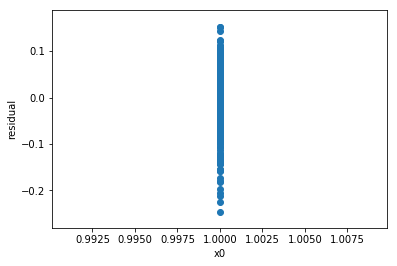

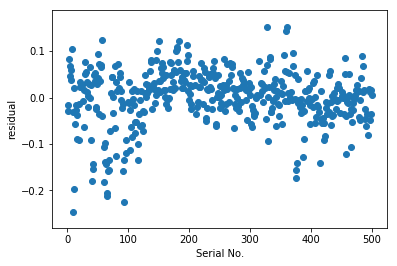

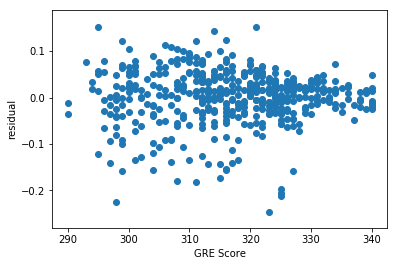

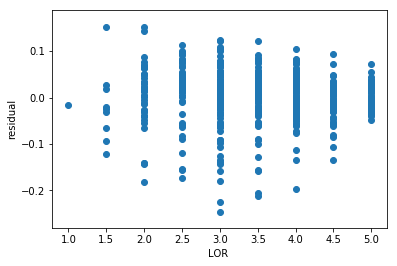

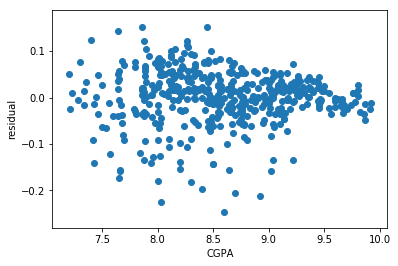

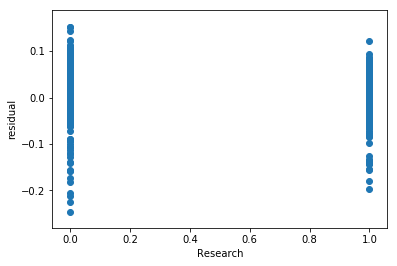

In [75]:
#residual plot residue versus CGPA
residual=df2_Y-pred_test
for x in df2_X.columns:
#     print x
    plt.scatter(df2_X[x],residual)
    plt.xlabel(x)
    plt.ylabel("residual")
    plt.show()